In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msg
import string
import re
import nltk
from scipy import spatial
from spellchecker import SpellChecker
from nltk.corpus import stopwords
from sklearn import preprocessing
from collections import Counter
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from scipy.spatial import distance
from imageio import imread
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
import random
import math
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import gensim
import re
import string
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
pd.options.mode.chained_assignment = None 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msg
import string
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import re
import nltk
from sklearn.model_selection import train_test_split
from spellchecker import SpellChecker
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import metrics
from sklearn import preprocessing
from collections import Counter
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from imageio import imread
import pickle
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from nltk import FreqDist
import plotly.express as px
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import multiprocessing

In [39]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv')

In [40]:
def sentiment(review):
    if review>=3:
        return 1
    else:
        return 0
df['Sentiment']= df['Rating'].apply(sentiment)

In [41]:
df

,Review,Rating,Sentiment
0,nice hotel expensive parking got good deal sta...,4,1
1,ok nothing special charge diamond member hilto...,2,0
2,nice rooms not 4* experience hotel monaco seat...,3,1
3,"unique, great stay, wonderful time hotel monac...",5,1
4,"great stay great stay, went seahawk game aweso...",5,1
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,1
20487,great location price view hotel great quick pl...,4,1
20488,"ok just looks nice modern outside, desk staff ...",2,0
20489,hotel theft ruined vacation hotel opened sept ...,1,0


# Preprocessing

## Quitar las stopwords

In [42]:
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [43]:
STOPWORDS = set(stopwords.words('english'))
STOPWORDS.add('u')
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in set(stopwords.words('english'))])

In [44]:
df["Review"] = df["Review"].apply(lambda text:remove_stopwords(text))

## Quitar las marcas de puntuación

In [45]:
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    PUNCT_TO_REMOVE = string.punctuation
    PUNCT_TO_REMOVE += 'â’'
    spaces = ''
    for i in range(len(PUNCT_TO_REMOVE)):
        spaces += ' '
    return text.translate(str.maketrans(PUNCT_TO_REMOVE, spaces))

In [46]:
df["Review"] = df["Review"].apply(lambda text: remove_punctuation(text))

## Corregir letras y números 

In [47]:
df['Review'] = df['Review'].map(lambda x: re.sub('[^A-Za-z ]+', '', x))

In [48]:
df[df.Review.str.contains(' i ')]

,Review,Rating,Sentiment
22,good value downtown hotel monaco seattle great...,4,1
28,nice hotel husband stayed warwick years ago l...,4,1
44,austin powers decor familiar hotel seattlewhe...,2,0
80,priority award floor member hilton honors pr...,2,0
89,close convention center stayed seattle crowne ...,4,1
...,...,...,...
20474,ok hotel bad location hotel terrible looming n...,2,0
20476,night trust disappointed stay hotel say best ...,5,1
20479,lack customer service skills overpriced place ...,2,0
20483,good bed clean convenient night happy stay hot...,4,1


## Lemmanization

In [49]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [50]:
df["Review"] = df["Review"].apply(lambda text: lemmatize_words(text))

## Corregir las palabras 

In [51]:
spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

In [52]:
df["Review"] = df["Review"].apply(lambda text: correct_spellings(text))

## Quitar las stopwords 

In [53]:
df["Review"] = df["Review"].apply(lambda text:remove_stopwords(text))

In [54]:
df.to_csv('final_prepro.csv', index=False)

In [55]:
df

,Review,Rating,Sentiment
0,nice hotel expensive parking got good deal sta...,4,1
1,ok nothing special charge diamond member hilto...,2,0
2,nice room experience hotel monaco seattle good...,3,1
3,unique great stay wonderful time hotel monaco ...,5,1
4,great stay great stay went seahawks game aweso...,5,1
...,...,...,...
20486,best kept secret red time staying charm star c...,5,1
20487,great location price view hotel great quick pl...,4,1
20488,ok look nice modern outside desk staff particu...,2,0
20489,hotel theft ruined vacation hotel opened sept ...,1,0


# Exploratory Data Analysis

In [2]:
df = pd.read_csv("final_prepro.csv")

# Estadísticas

In [6]:
df.describe()

,Rating,Sentiment
count,20491.000000,20491.000000
mean,3.952223,0.843151
std,1.233030,0.363668
min,1.000000,0.000000
25%,3.000000,1.000000
50%,4.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


<AxesSubplot:xlabel='Rating', ylabel='count'>

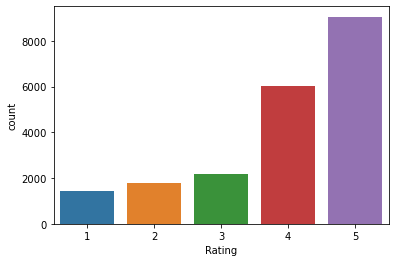

In [7]:
sns.countplot(x= df['Rating'])

In [8]:
df['Rating'].value_counts().sort_index()

1    1421
2    1793
3    2184
4    6039
5    9054
Name: Rating, dtype: int64

# WordCloud

In [9]:
df_positivo = df.loc[df.loc[:, 'Sentiment'] == 1]

In [10]:
df_positivo

,Review,Rating,Sentiment
0,nice hotel expensive parking got good deal sta...,4,1
2,nice room experience hotel monaco seattle good...,3,1
3,unique great stay wonderful time hotel monaco ...,5,1
4,great stay great stay went seahawks game aweso...,5,1
5,love monaco staff husband stayed hotel crazy w...,5,1
...,...,...,...
20480,great play stay stay loyal inn package deal ha...,5,1
20482,great choice wife chose best western quite bit...,5,1
20483,good bed clean convenient night happy stay hot...,4,1
20486,best kept secret red time staying charm star c...,5,1


In [11]:
df_negativo = df.loc[df.loc[:, 'Sentiment'] == 0]

In [12]:
df_negativo

,Review,Rating,Sentiment
1,ok nothing special charge diamond member hilto...,2,0
10,poor value stayed monaco seattle july nice hot...,2,0
15,horrible customer service hotel stay february ...,1,0
16,disappointed say anticipating stay hotel monac...,2,0
24,great location need internally upgrade advanta...,2,0
...,...,...,...
20484,deceptive staff deceptive desk staff claiming ...,2,0
20485,impressed unfriendly staff checked asked highe...,2,0
20488,ok look nice modern outside desk staff particu...,2,0
20489,hotel theft ruined vacation hotel opened sept ...,1,0


(-0.5, 1799.5, 1399.5, -0.5)

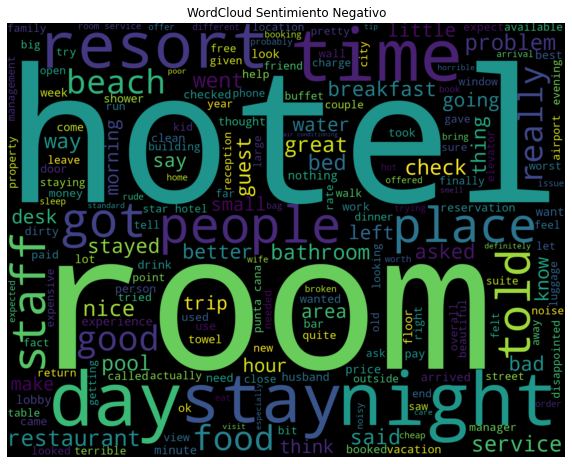

In [13]:
wc_negative = WordCloud(background_color='black',width=1800,height=1400).generate(' '.join(df_negativo['Review']))
plt.figure(figsize=(10,8))
plt.imshow(wc_negative, interpolation='bilinear')
plt.title("WordCloud Sentimiento Negativo")
plt.axis("off")

(-0.5, 1799.5, 1399.5, -0.5)

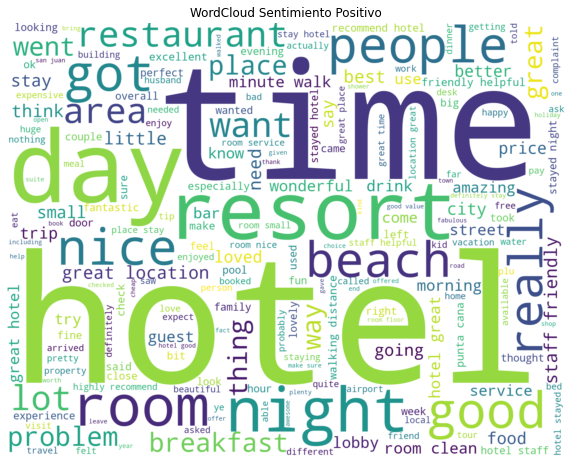

In [14]:
wc_positive = WordCloud(background_color='white',width=1800,height=1400).generate(' '.join(df_positivo['Review']))
plt.figure(figsize=(10,8))
plt.imshow(wc_positive, interpolation='bilinear')
plt.title("WordCloud Sentimiento Positivo")
plt.axis("off")   

## Gráfico de distribución de frecuencia de palabras en la columna 'Review'

In [17]:
# función para plotear los términos más frecuentes
def freq_words(x, terms = 30): # mínimos de 30 apariciones en el conjunto de datos
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  # seleccionando las 30 palabras más frecuentes 
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(40,12))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()
  fig =  px.histogram(d, x="word",y="count",
                   title="30 Most Frequent Words",
                   color_discrete_sequence=['indianred'])
  fig.show()

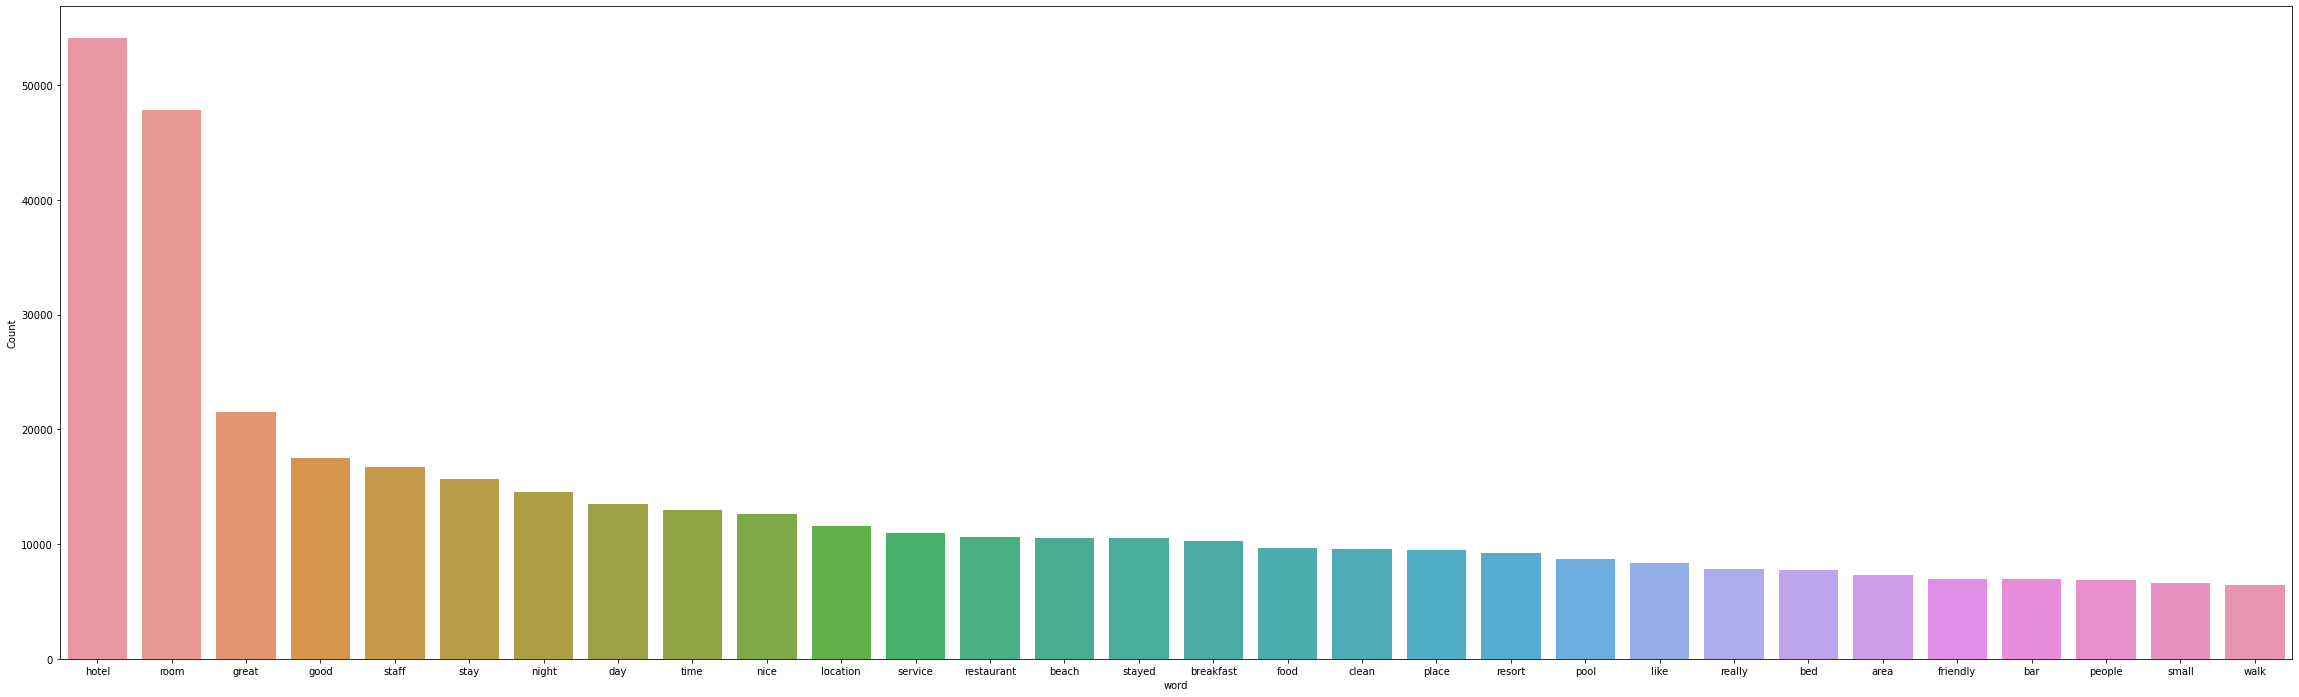

In [18]:
freq_words(df['Review'])

### Palabras más frecuentes 

In [19]:
cnt = Counter()
for text in df["Review"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(30)

[('hotel', 54163),
 ('room', 47813),
 ('great', 21502),
 ('good', 17499),
 ('staff', 16722),
 ('stay', 15635),
 ('night', 14584),
 ('day', 13494),
 ('time', 12986),
 ('nice', 12664),
 ('location', 11598),
 ('service', 10984),
 ('restaurant', 10633),
 ('beach', 10543),
 ('stayed', 10518),
 ('breakfast', 10232),
 ('food', 9701),
 ('clean', 9612),
 ('place', 9523),
 ('resort', 9187),
 ('pool', 8696),
 ('like', 8327),
 ('really', 7793),
 ('bed', 7731),
 ('area', 7279),
 ('friendly', 6975),
 ('bar', 6957),
 ('people', 6881),
 ('small', 6600),
 ('walk', 6403)]

# Representación TF-IDF

In [3]:
reviews_array = np.array(df["Review"])
print(len(reviews_array))

20491


In [4]:
vectorizer = TfidfVectorizer(min_df = 50,stop_words='english') #deberá haber un mínimo de 50 apariciones en todo el dataset
train_bow = vectorizer.fit_transform(reviews_array)
print("Tamaño de la matriz después de aplicar TF-IDF : ",train_bow.shape)

Tamaño de la matriz después de aplicar TF-IDF :  (20491, 3297)


In [6]:
df_tfidf = pd.DataFrame(train_bow.todense(), columns=vectorizer.get_feature_names())
df_tfidf["Rating"] = df["Rating"]
df_tfidf["Sentiment"] = df["Sentiment"]
df_tfidf.to_csv('final_tfidf.csv', index=False)
df_tfidf

,able,absolute,absolutely,abundance,ac,academia,accept,acceptable,accepted,access,...,york,young,younger,yr,yummy,zero,zone,zoo,Rating,Sentiment
0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4,1
1,0.0,0.0,0.000000,0.0,0.068723,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2,0
2,0.0,0.0,0.000000,0.0,0.085111,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3,1
3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5,1
4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.098672,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.144051,0.0,0.0,0.0,0.0,0.0,5,1
20487,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4,1
20488,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2,0
20489,0.0,0.0,0.046809,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.028695,0.000000,0.0,0.0,0.0,0.0,0.0,1,0


# Representación mediante Embeddings 

In [3]:
df = pd.read_csv('final_prepro.csv')

In [7]:
review_array = [str(i) for i in df['Review'].copy().array]
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(review_array)]
model = Doc2Vec(documents=tagged_data, min_count=200,vector_size = 300,workers = 5)

In [8]:
from gensim.test.utils import get_tmpfile
filename = get_tmpfile("my_doc2vec")
model.save(filename)
model.save("doc_2vec_model")
model = Doc2Vec.load("doc_2vec_model")

In [10]:
df_emb = pd.DataFrame(columns=list(range(300)),index=list(range(20491))) #hay que adaptarlo al tamaño de nuestro df
tagged_df = pd.Series( (v[0] for v in tagged_data))
vectorized_tagged_df = tagged_df.apply(model.infer_vector)
for i in range(df.shape[0]):
    df_emb.loc[i] = pd.Series(vectorized_tagged_df[i])

In [11]:
df_emb.to_csv("df_emb_veconly.csv", index=False)
df_emb = pd.read_csv("df_emb_veconly.csv")

In [12]:
df_emb

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.023697,-0.130633,-0.100791,-0.100557,-0.204194,0.143830,0.231039,0.173075,-0.173029,-0.178188,...,0.066208,0.442417,-0.033009,0.089080,0.296354,0.177126,-0.001706,0.023430,-0.139735,-0.201212
1,-0.057572,-0.500197,0.156804,-0.242103,-0.233885,0.067310,-0.114902,0.098009,-0.004811,-0.081834,...,0.353535,0.134471,0.219842,-0.270567,0.182315,-0.164943,0.080507,-0.399801,-0.133953,0.193157
2,0.097515,0.346928,0.012608,0.100578,-0.261885,0.172704,0.249337,0.257455,-0.301215,0.096724,...,-0.022691,0.065362,0.031197,-0.274087,0.099027,-0.077913,-0.184946,0.037166,-0.168977,-0.115916
3,-0.004979,0.064940,0.050865,0.010184,-0.142138,0.051669,0.197790,0.214490,0.006535,0.053583,...,0.164948,0.196225,0.099339,0.133275,0.338657,0.196331,0.103324,0.137472,-0.106409,-0.037572
4,0.254738,0.299239,-0.199674,0.106396,0.023387,-0.002373,0.210404,-0.132777,0.010020,0.029654,...,-0.050706,0.132875,0.143650,-0.076382,0.005581,-0.129261,-0.160328,0.109794,-0.387192,0.027221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,0.166380,-0.008160,-0.052602,0.013538,-0.154694,0.071602,0.103800,-0.094258,-0.079527,-0.052937,...,0.169923,-0.057017,0.209822,0.112529,0.131229,0.106557,0.036106,-0.135447,-0.176256,0.022670
20487,-0.005054,-0.050559,0.141389,0.051035,-0.091768,0.032610,0.019512,0.126940,-0.021211,-0.035318,...,-0.004874,0.123499,-0.012077,0.044909,0.197701,0.112737,-0.025017,-0.090328,-0.077373,-0.122324
20488,0.115170,0.068319,-0.022656,0.121963,0.046934,-0.073685,0.056421,0.117913,-0.189739,0.050900,...,0.191991,0.149782,0.037307,0.052826,0.266925,0.119084,0.038184,-0.127434,0.067411,-0.175638
20489,0.314230,-0.098278,-0.259897,-0.134193,-0.006377,-0.175853,-0.008692,0.707823,-0.304421,-0.650492,...,0.178310,0.204746,0.492687,-0.290961,0.168687,-0.016318,0.009190,0.087138,0.672552,0.259567


In [15]:
df_emb['Review'] = df['Review']; df_emb['Rating'] = df['Rating']; df_emb['Sentiment'] = df['Sentiment']

In [17]:
df_emb.to_csv("final_emb.csv", index=False)

# Creación del modelo

## Modelo 1: Perceptrón simple

### Utilizando la representación vectorial TF-IDF 

In [206]:
df_tfidf = pd.read_csv('final_tfidf.csv')
df_tfidf

,able,absolute,absolutely,abundance,ac,academia,accept,acceptable,accepted,access,...,york,young,younger,yr,yummy,zero,zone,zoo,Rating,Sentiment
0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4,1
1,0.0,0.0,0.000000,0.0,0.068723,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2,0
2,0.0,0.0,0.000000,0.0,0.085111,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3,1
3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5,1
4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.098672,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.144051,0.0,0.0,0.0,0.0,0.0,5,1
20487,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4,1
20488,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2,0
20489,0.0,0.0,0.046809,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.028695,0.000000,0.0,0.0,0.0,0.0,0.0,1,0


In [207]:
X = df_tfidf.drop(['Rating', 'Sentiment'],axis=1,inplace=False)
X

,able,absolute,absolutely,abundance,ac,academia,accept,acceptable,accepted,access,...,yoghurt,yogurt,york,young,younger,yr,yummy,zero,zone,zoo
0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.068723,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.085111,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.098672,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.144051,0.0,0.0,0.0,0.0,0.0
20487,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
20488,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
20489,0.0,0.0,0.046809,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.028695,0.000000,0.0,0.0,0.0,0.0,0.0


In [208]:
y = np.ravel(df_tfidf.filter(items=['Rating']))
y_sentiment = np.ravel(df_tfidf.filter(items=['Sentiment']))

In [209]:
y

array([4, 2, 3, ..., 2, 1, 2])

In [39]:
y_sentiment

array([1, 0, 1, ..., 0, 0, 0])

### Ahora nos centraremos en clasificar respecto al 'Rating'

In [40]:
print('Ahora mismo estamos tratando con ' + str(df_tfidf.shape) + ' atributos')

Ahora mismo estamos tratando con (20491, 3299) atributos


Queremos reducir el número de atributos, pero tendremos que definir un críterio de elección. Iremos iterando hasta encontrar el número óptimo (más o menos) de atributos a utilizar, basándonos en el mejor f1-score ponderado logrado.

Para ello, primeramente separaremos los conjuntos de entrenamiento y testeo utilizando la técnica HOLD-OUT con los porcentajes 70 - 30

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [42]:
from sklearn.linear_model import Perceptron

In [44]:
score = []
max_score = 0
values = []
aux = 0

for i in range(10,3300,100):
    best_features = SelectKBest(k=i)
    fit = best_features.fit(X_train, np.ravel(y_train))
    df_new = df_tfidf[X.columns[fit.get_support()]]
    perceptron = Perceptron(max_iter=500,eta0=1.0)
    cv = KFold(n_splits=10)
    yhat = cross_val_predict(perceptron, df_new, y, cv=cv)
    score2 = metrics.f1_score(y, yhat, average='weighted')
    if (score2>max_score):
        max_score=score2
        aux = i
        bestFeatures = df_new
    score.append(score2)
    values.append(i)
    Valor = 'i: ' + str(i) + ' -> value: ' + str(score2) 
    print(Valor)

i: 10 -> value: 0.3581820702416335
i: 110 -> value: 0.49432750819879634
i: 210 -> value: 0.5026657139951056
i: 310 -> value: 0.49070388083420013
i: 410 -> value: 0.5135228772604206
i: 510 -> value: 0.5368133082928107
i: 610 -> value: 0.5361121776563522
i: 710 -> value: 0.530349607363431
i: 810 -> value: 0.5393176730543197
i: 910 -> value: 0.5568182205403117
i: 1010 -> value: 0.543007117227449
i: 1110 -> value: 0.54598951731177
i: 1210 -> value: 0.5439071199586673
i: 1310 -> value: 0.5557580913685631
i: 1410 -> value: 0.552813908282016
i: 1510 -> value: 0.544296080160975
i: 1610 -> value: 0.5358846159133482
i: 1710 -> value: 0.5460715590126413
i: 1810 -> value: 0.5445577167885685


KeyboardInterrupt: 

In [58]:
m_score = 'MAX i: ' + str(aux) + ' -> MAX value: ' + str(max_score) 
print(m_score)

MAX i: 2310 -> MAX value: 0.5570784264011456


Text(0, 0.5, 'Score')

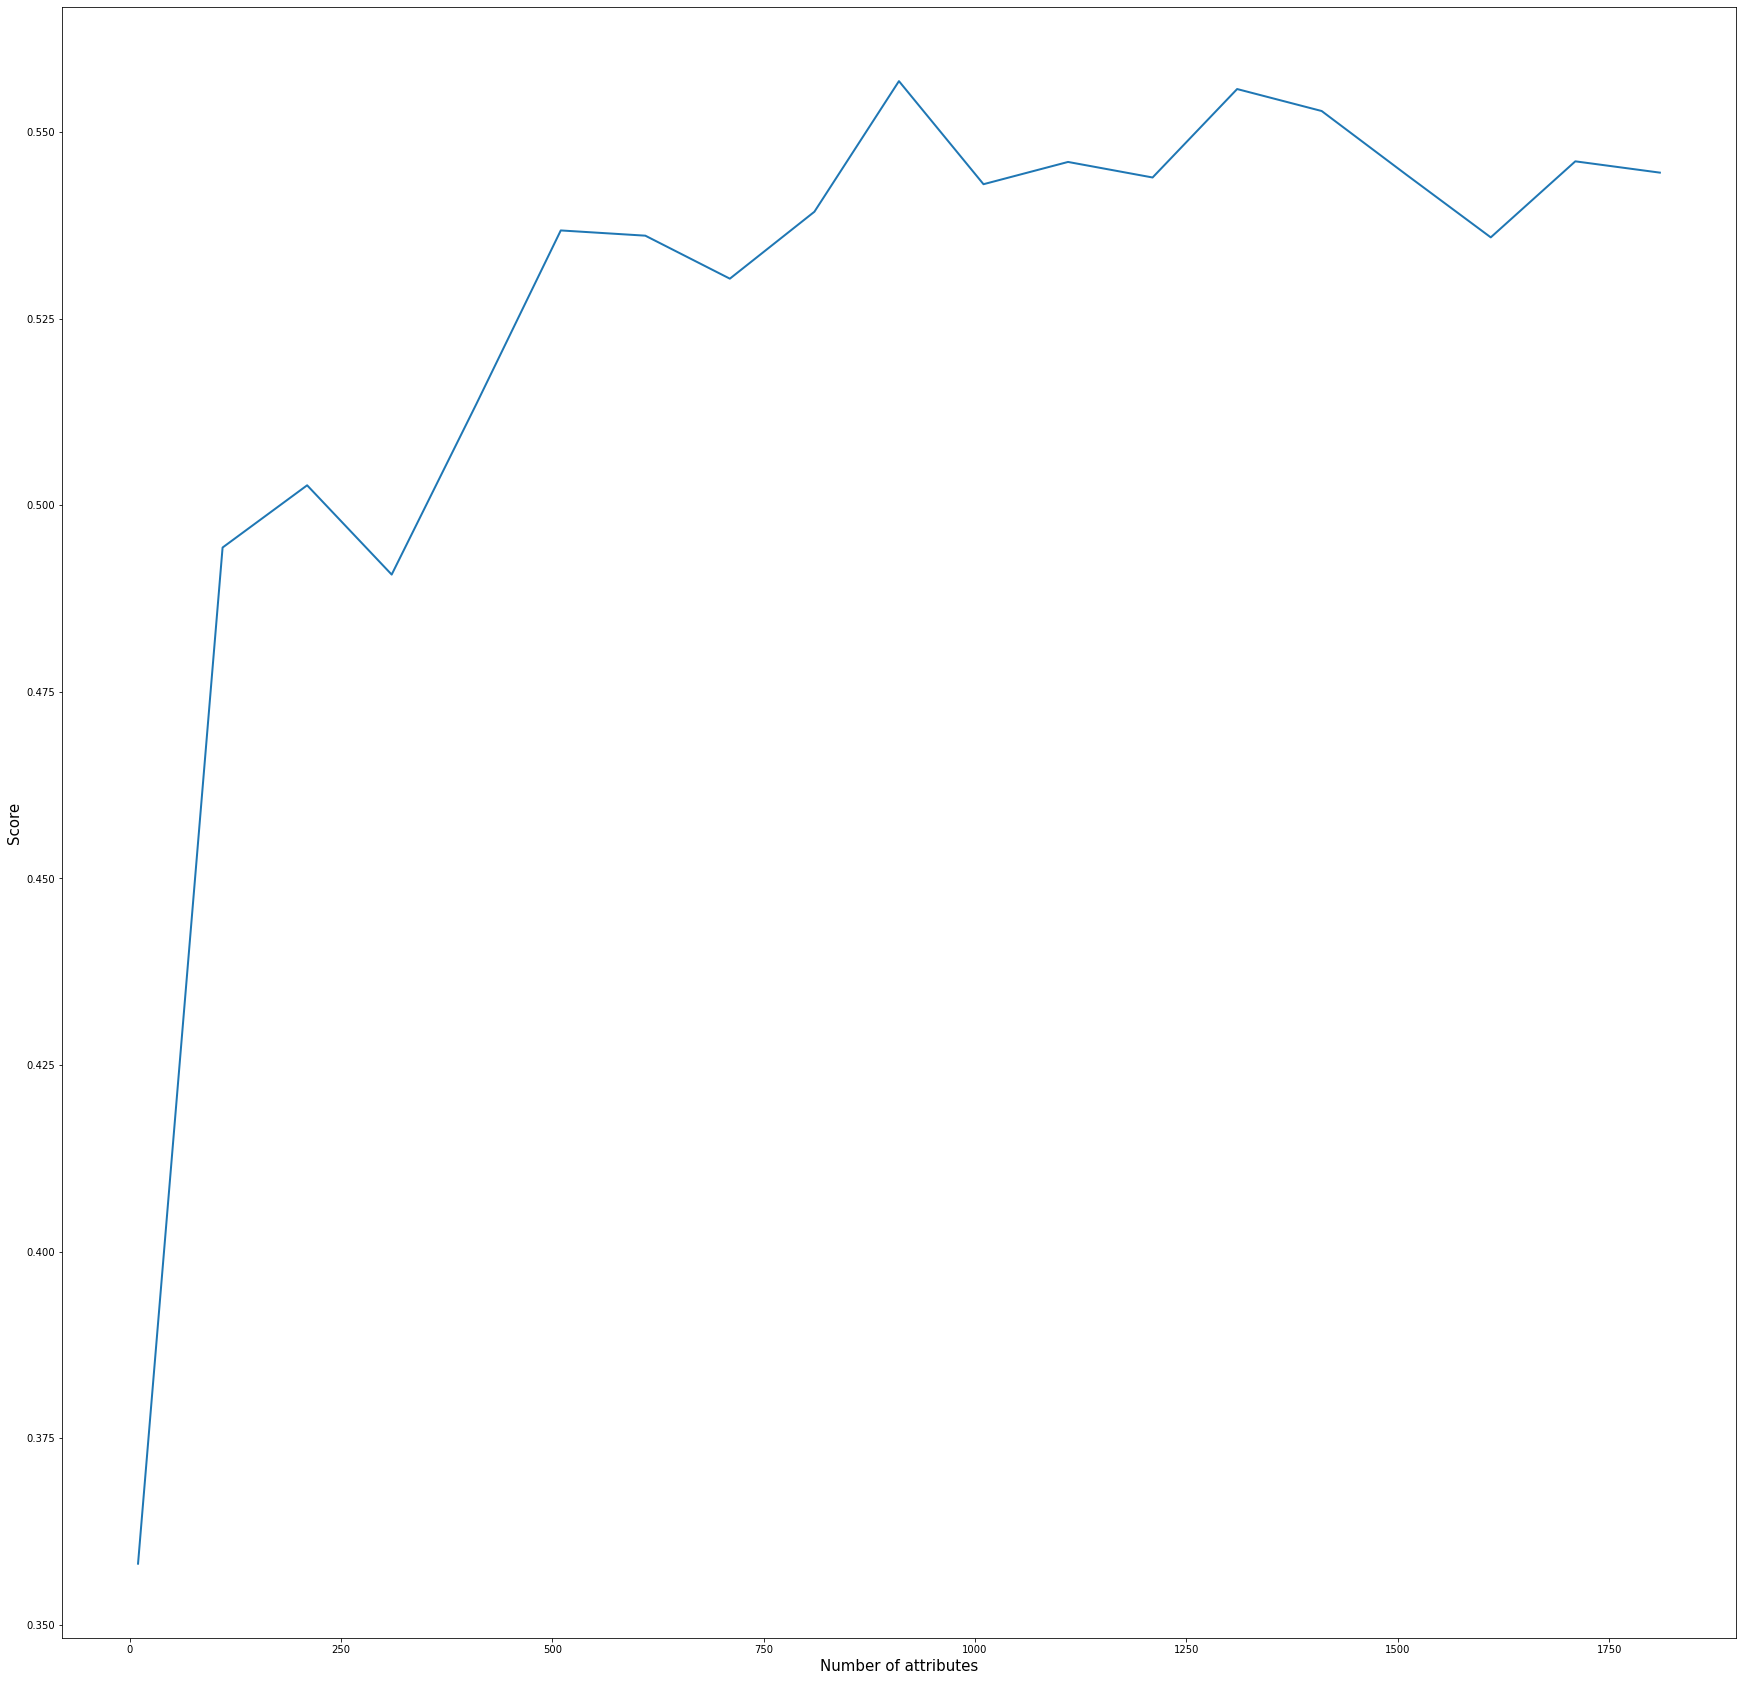

In [45]:
plt.figure(figsize=(30,30))
plt.plot(values,score, linewidth=2.0, label='fit')
plt.xlabel("Number of attributes",fontsize = 15)
plt.ylabel("Score",fontsize = 15)

Como podemos observar, los mejores resultados los hemos conseguido con 2310 atributos, por lo que vamos a trabajar con ellos.

In [43]:
bestFeatures.to_csv('best_features_tfidf.csv', index=False)
bestFeatures

NameError: name 'bestFeatures' is not defined

In [211]:
X = pd.read_csv('best_features_tfidf.csv')

In [212]:
X

,absolutely,accept,acceptable,access,accommodating,according,account,acted,actual,actually,...,worn,worse,worst,wouldnt,wow,wrong,wrote,year,yelling,york
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.000000,0.098672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
20487,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
20488,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
20489,0.046809,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023735,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.058646,0.0,0.0


In [213]:
y

array([4, 2, 3, ..., 2, 1, 2])

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [219]:
model = Perceptron(max_iter=500, eta0=1.0)
model.fit(X_train, y_train)

Perceptron(max_iter=500)

In [90]:
y_predicciones = model.predict(X_test)

In [91]:
#Métricas de evaluación
classificationReport = classification_report(y_test, y_predicciones)

In [92]:
print(classificationReport)

              precision    recall  f1-score   support

           1       0.61      0.57      0.59       449
           2       0.40      0.32      0.35       526
           3       0.42      0.24      0.31       669
           4       0.52      0.28      0.37      1825
           5       0.63      0.92      0.75      2679

    accuracy                           0.58      6148
   macro avg       0.52      0.47      0.47      6148
weighted avg       0.55      0.58      0.54      6148



In [93]:
confusion_matrix_fea = multilabel_confusion_matrix(y_test, y_predicciones)
print(confusion_matrix_fea)

[[[5538  161]
  [ 192  257]]

 [[5370  252]
  [ 360  166]]

 [[5257  222]
  [ 508  161]]

 [[3854  469]
  [1312  513]]

 [[1991 1478]
  [ 210 2469]]]


In [94]:
#conseguimos la matriz de confusión
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_predicciones, labels=model.classes_)

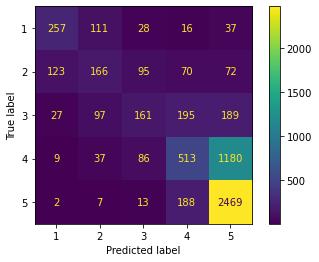

In [95]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=model.classes_)
cm.plot()

In [96]:
# evaluate a perceptron model on the dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.535 (0.053)


In [221]:
model = Perceptron(max_iter=500, eta0=1.0)
cv = KFold(n_splits=10)
yhat = cross_val_predict(model, X, y, cv=cv)
score2 = metrics.f1_score(y, yhat, average='weighted')
print('Weighted average FScore: ' +str(score2))

Weighted average FScore: 0.5568182205403117


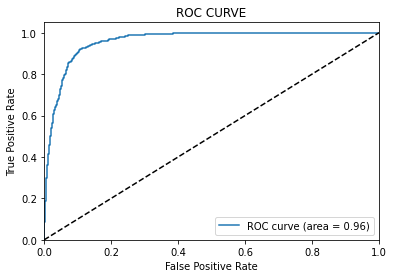

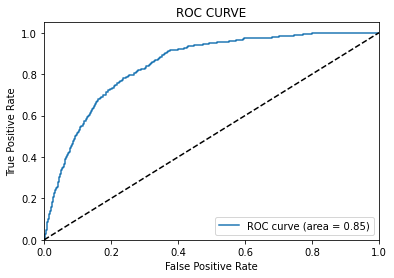

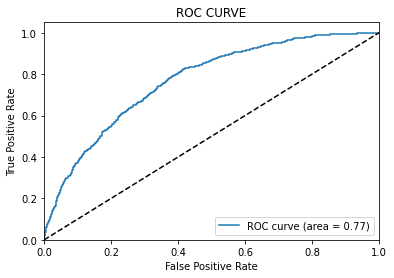

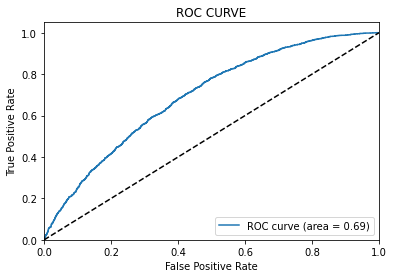

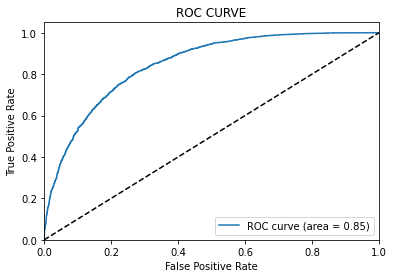

In [56]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt


y = label_binarize(y, classes=[1,2,3,4,5])
n_classes = 5

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.3, random_state=7)

# classifier
clf = OneVsRestClassifier(Perceptron(max_iter=500, eta0=1.0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC CURVE')
    plt.legend(loc="lower right")
    plt.show()


### Utilizando la representación vectorial Embeddings 

In [222]:
df_emb = pd.read_csv('final_emb.csv')

In [223]:
X = df_emb.drop(['Rating', 'Sentiment', 'Review'],axis=1,inplace=False)
X

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.023697,-0.130633,-0.100791,-0.100557,-0.204194,0.143830,0.231039,0.173075,-0.173029,-0.178188,...,0.066208,0.442417,-0.033009,0.089080,0.296354,0.177126,-0.001706,0.023430,-0.139735,-0.201212
1,-0.057572,-0.500197,0.156804,-0.242103,-0.233885,0.067310,-0.114902,0.098009,-0.004811,-0.081834,...,0.353535,0.134471,0.219842,-0.270567,0.182315,-0.164943,0.080507,-0.399801,-0.133953,0.193157
2,0.097515,0.346928,0.012608,0.100578,-0.261885,0.172704,0.249337,0.257455,-0.301215,0.096724,...,-0.022691,0.065362,0.031197,-0.274087,0.099027,-0.077913,-0.184946,0.037166,-0.168977,-0.115916
3,-0.004979,0.064940,0.050865,0.010184,-0.142138,0.051669,0.197790,0.214490,0.006535,0.053583,...,0.164948,0.196225,0.099339,0.133275,0.338657,0.196331,0.103324,0.137472,-0.106409,-0.037572
4,0.254738,0.299239,-0.199674,0.106396,0.023387,-0.002373,0.210404,-0.132777,0.010020,0.029654,...,-0.050706,0.132875,0.143650,-0.076382,0.005581,-0.129261,-0.160328,0.109794,-0.387192,0.027221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,0.166380,-0.008160,-0.052602,0.013538,-0.154694,0.071602,0.103800,-0.094258,-0.079527,-0.052937,...,0.169923,-0.057017,0.209822,0.112529,0.131229,0.106557,0.036106,-0.135447,-0.176256,0.022670
20487,-0.005054,-0.050559,0.141389,0.051035,-0.091768,0.032610,0.019512,0.126940,-0.021211,-0.035318,...,-0.004874,0.123499,-0.012077,0.044909,0.197701,0.112737,-0.025017,-0.090328,-0.077373,-0.122324
20488,0.115170,0.068319,-0.022656,0.121963,0.046934,-0.073685,0.056421,0.117913,-0.189739,0.050900,...,0.191991,0.149782,0.037307,0.052826,0.266925,0.119084,0.038184,-0.127434,0.067411,-0.175638
20489,0.314230,-0.098278,-0.259897,-0.134193,-0.006377,-0.175853,-0.008692,0.707823,-0.304421,-0.650492,...,0.178310,0.204746,0.492687,-0.290961,0.168687,-0.016318,0.009190,0.087138,0.672552,0.259567


In [224]:
y = np.ravel(df_emb.filter(items=['Rating']))

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [185]:
model = Perceptron(max_iter=1000, eta0=1.0)
model.fit(X_train, y_train)

Perceptron()

In [186]:
y_predicciones = model.predict(X_test)

In [187]:
#Métricas de evaluación
classificationReport = classification_report(y_test, y_predicciones)

In [188]:
print(classificationReport)

              precision    recall  f1-score   support

           1       0.27      0.42      0.33       424
           2       0.24      0.28      0.26       523
           3       0.27      0.07      0.12       656
           4       0.44      0.16      0.24      1828
           5       0.58      0.86      0.69      2717

    accuracy                           0.49      6148
   macro avg       0.36      0.36      0.33      6148
weighted avg       0.46      0.49      0.43      6148



In [120]:
confusion_matrix_fea = multilabel_confusion_matrix(y_test, y_predicciones)
print(confusion_matrix_fea)

[[[5669   54]
  [ 393   32]]

 [[3860 1774]
  [ 147  367]]

 [[5443   40]
  [ 649   16]]

 [[3716  619]
  [1356  457]]

 [[2475  942]
  [ 884 1847]]]


In [121]:
#conseguimos la matriz de confusión
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_predicciones, labels=model.classes_)

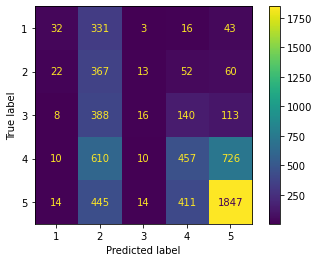

In [122]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=model.classes_)
cm.plot()

In [123]:
# evaluate a perceptron model on the dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.476 (0.031)


In [226]:
model = Perceptron(max_iter=500, eta0=1.0)
cv = KFold(n_splits=10)
yhat = cross_val_predict(model, X, y, cv=cv)
score2 = metrics.f1_score(y, yhat, average='weighted')
print('Weighted average FScore: ' +str(score2))

Weighted average FScore: 0.4672132901663959


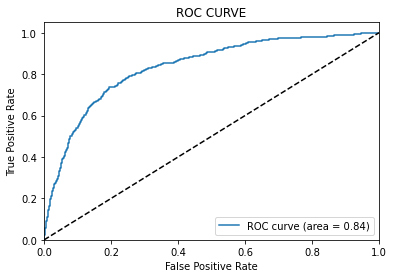

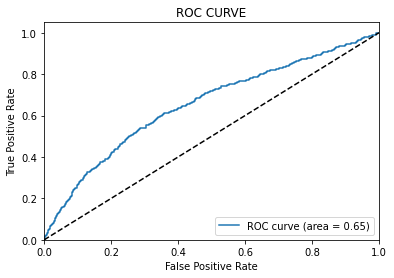

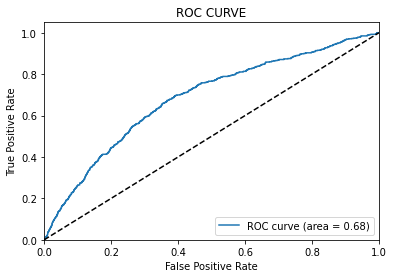

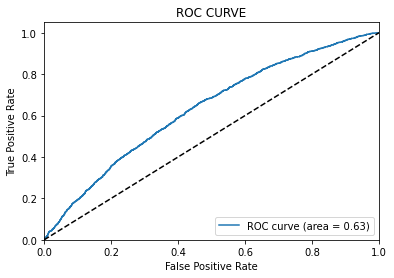

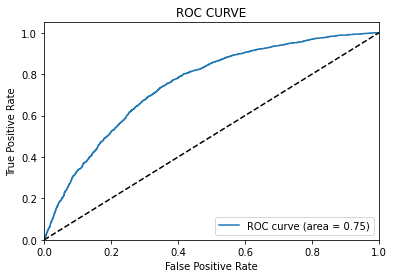

In [70]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt


y = label_binarize(y, classes=[1,2,3,4,5])
n_classes = 5

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.3, random_state=7)

# classifier
clf = OneVsRestClassifier(Perceptron(max_iter=500, eta0=1.0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC CURVE')
    plt.legend(loc="lower right")
    plt.show()

## Modelo 2: Red Neuronal

### Utilizando la representación vectorial TF-IDF 

In [227]:
df_tfidf = pd.read_csv('final_tfidf.csv')
df_tfidf

,able,absolute,absolutely,abundance,ac,academia,accept,acceptable,accepted,access,...,york,young,younger,yr,yummy,zero,zone,zoo,Rating,Sentiment
0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4,1
1,0.0,0.0,0.000000,0.0,0.068723,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2,0
2,0.0,0.0,0.000000,0.0,0.085111,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3,1
3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5,1
4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.098672,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.144051,0.0,0.0,0.0,0.0,0.0,5,1
20487,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4,1
20488,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2,0
20489,0.0,0.0,0.046809,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.028695,0.000000,0.0,0.0,0.0,0.0,0.0,1,0


In [228]:
y = np.ravel(df_tfidf.filter(items=['Rating']))

In [229]:
X = pd.read_csv('best_features_tfidf.csv')

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [193]:
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

In [145]:
# Número de neuronas
param_grid = {'hidden_layer_sizes':[1, 5, 10, 15, 20, 40]}

grid = GridSearchCV(
        estimator = MLPClassifier(
                        learning_rate_init=0.01,
                        solver = 'lbfgs',
                        alpha  = 0,
                        max_iter = 500,
                        random_state = 123
                    ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 3,
        refit      = True,
        return_train_score = True
      )

_ = grid.fit(X, y)

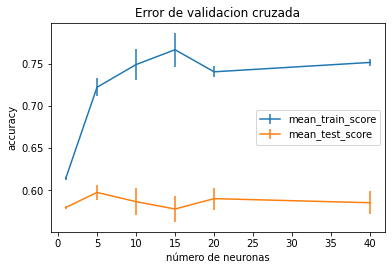

In [146]:
fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_hidden_layer_sizes', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_hidden_layer_sizes', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_ylabel('accuracy')
ax.set_xlabel('número de neuronas')
ax.set_title('Error de validacion cruzada');

In [147]:
# learning rate
param_grid = {'learning_rate_init':[0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(
        estimator = MLPClassifier(
                        hidden_layer_sizes=(15),
                        solver = 'adam',
                        alpha  = 0,
                        max_iter = 500,
                        random_state = 123
                    ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 3,
        refit      = True,
        return_train_score = True
      )

_ = grid.fit(X, y)

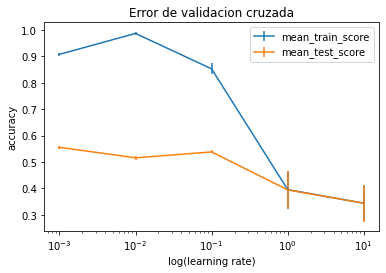

In [148]:
fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_learning_rate_init', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_learning_rate_init', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_xscale('log')
ax.set_xlabel('log(learning rate)')
ax.set_ylabel('accuracy')
ax.set_title('Error de validacion cruzada');

Si bien los dos ejemplos anteriores sirven para tener una idea intuitiva de cómo afecta cada hiperparámetro, no es posible optimizarlos de forma individual, ya que el impacto final que tiene cada uno depende de qué valor tomen los demás. La búsqueda de hiperparámetros debe hacerse en conjunto.

Dado el elevado número de hiperparámetros que tiene los modelos de redes neuronales, la combinación de posibles configuraciones es muy elevada. Esto hace que la búsqueda de hiperparámetros por grid search cartesiano (todas las combinaciones) sea poco práctica. En su lugar, suele emplearse random grid search, que hace una búsqueda de combinaciones aleatorias. Para más información sobre esta y otras estrategias de búsqueda consultar Hiperparámetros (tuning)).

In [149]:
# Espacio de búsqueda de cada hiperparámetro
param_distributions = {
    'hidden_layer_sizes': [(15), (10, 10), (15, 15)],
    'alpha': np.logspace(-3, 3, 7),
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Búsqueda por validación cruzada
grid = RandomizedSearchCV(
        estimator  = MLPClassifier(solver = 'lbfgs', max_iter= 500),
        param_distributions = param_distributions,
        n_iter     = 50, # Número máximo de combinaciones probadas
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 3, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X, y = y)

# Resultados del grid
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

,param_learning_rate_init,param_hidden_layer_sizes,param_alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
41,0.001,15,10,0.619979,0.009301,0.707969,0.008327
30,0.01,15,10,0.619150,0.009277,0.706725,0.007484
4,0.01,"(15, 15)",10,0.607535,0.010349,0.718559,0.010040
21,0.1,"(15, 15)",10,0.603972,0.008088,0.722683,0.004154
34,0.1,"(10, 10)",10,0.602801,0.003828,0.718535,0.004936
7,0.01,"(10, 10)",10,0.602460,0.004806,0.729833,0.016035
19,0.1,"(15, 15)",0.001,0.598457,0.012073,0.731394,0.019960
1,0.001,"(10, 10)",10,0.595920,0.010275,0.675785,0.043454
14,0.1,15,0.01,0.590503,0.012804,0.743278,0.004874
9,0.01,"(10, 10)",0.01,0.590114,0.015859,0.740326,0.029338


In [230]:
modelo = grid.best_estimator_
modelo

MLPClassifier(alpha=10.0, hidden_layer_sizes=15, max_iter=500, solver='lbfgs')

In [195]:
y_predicciones = modelo.predict(X_test)

In [154]:
#conseguimos la matriz de confusión
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_predicciones, labels=modelo.classes_)

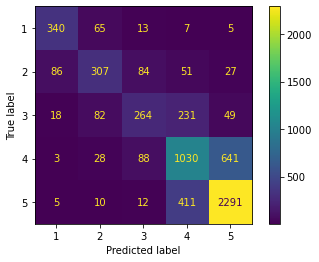

In [156]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=modelo.classes_)
cm.plot()

In [196]:
#Métricas de evaluación
classificationReport = classification_report(y_test, y_predicciones)
print(classificationReport)

              precision    recall  f1-score   support

           1       0.79      0.80      0.79       420
           2       0.63      0.60      0.62       535
           3       0.59      0.40      0.47       643
           4       0.60      0.58      0.59      1869
           5       0.75      0.84      0.79      2681

    accuracy                           0.69      6148
   macro avg       0.67      0.64      0.65      6148
weighted avg       0.68      0.69      0.68      6148



In [231]:
cv = KFold(n_splits=10)
yhat = cross_val_predict(modelo, X, y, cv=cv)
score2 = metrics.f1_score(y, yhat, average='weighted')
print('Weighted average FScore: ' +str(score2))

Weighted average FScore: 0.6184500469307669


### Utilizando la representación vectorial Embeddings

In [237]:
df_emb = pd.read_csv('final_emb.csv')

In [238]:
X = df_emb.drop(['Rating', 'Sentiment', 'Review'],axis=1,inplace=False)
X

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.023697,-0.130633,-0.100791,-0.100557,-0.204194,0.143830,0.231039,0.173075,-0.173029,-0.178188,...,0.066208,0.442417,-0.033009,0.089080,0.296354,0.177126,-0.001706,0.023430,-0.139735,-0.201212
1,-0.057572,-0.500197,0.156804,-0.242103,-0.233885,0.067310,-0.114902,0.098009,-0.004811,-0.081834,...,0.353535,0.134471,0.219842,-0.270567,0.182315,-0.164943,0.080507,-0.399801,-0.133953,0.193157
2,0.097515,0.346928,0.012608,0.100578,-0.261885,0.172704,0.249337,0.257455,-0.301215,0.096724,...,-0.022691,0.065362,0.031197,-0.274087,0.099027,-0.077913,-0.184946,0.037166,-0.168977,-0.115916
3,-0.004979,0.064940,0.050865,0.010184,-0.142138,0.051669,0.197790,0.214490,0.006535,0.053583,...,0.164948,0.196225,0.099339,0.133275,0.338657,0.196331,0.103324,0.137472,-0.106409,-0.037572
4,0.254738,0.299239,-0.199674,0.106396,0.023387,-0.002373,0.210404,-0.132777,0.010020,0.029654,...,-0.050706,0.132875,0.143650,-0.076382,0.005581,-0.129261,-0.160328,0.109794,-0.387192,0.027221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,0.166380,-0.008160,-0.052602,0.013538,-0.154694,0.071602,0.103800,-0.094258,-0.079527,-0.052937,...,0.169923,-0.057017,0.209822,0.112529,0.131229,0.106557,0.036106,-0.135447,-0.176256,0.022670
20487,-0.005054,-0.050559,0.141389,0.051035,-0.091768,0.032610,0.019512,0.126940,-0.021211,-0.035318,...,-0.004874,0.123499,-0.012077,0.044909,0.197701,0.112737,-0.025017,-0.090328,-0.077373,-0.122324
20488,0.115170,0.068319,-0.022656,0.121963,0.046934,-0.073685,0.056421,0.117913,-0.189739,0.050900,...,0.191991,0.149782,0.037307,0.052826,0.266925,0.119084,0.038184,-0.127434,0.067411,-0.175638
20489,0.314230,-0.098278,-0.259897,-0.134193,-0.006377,-0.175853,-0.008692,0.707823,-0.304421,-0.650492,...,0.178310,0.204746,0.492687,-0.290961,0.168687,-0.016318,0.009190,0.087138,0.672552,0.259567


In [239]:
y = np.ravel(df_emb.filter(items=['Rating']))

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [254]:
# Número de neuronas
param_grid = {'hidden_layer_sizes':[1, 5, 10, 15, 20, 40, 50, 100]}

grid = GridSearchCV(
        estimator = MLPClassifier(
                        learning_rate_init=0.01,
                        solver = 'lbfgs',
                        alpha  = 0,
                        max_iter = 500,
                        random_state = 123
                    ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 3,
        refit      = True,
        return_train_score = True
      )

_ = grid.fit(X, y)

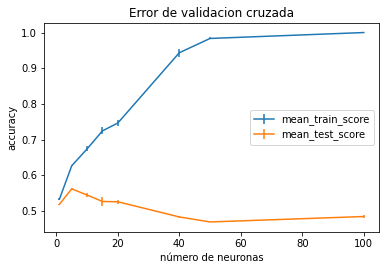

In [255]:
fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_hidden_layer_sizes', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_hidden_layer_sizes', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_ylabel('accuracy')
ax.set_xlabel('número de neuronas')
ax.set_title('Error de validacion cruzada');

In [256]:
# learning rate
param_grid = {'learning_rate_init':[0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(
        estimator = MLPClassifier(
                        hidden_layer_sizes=(100),
                        solver = 'adam',
                        alpha  = 0,
                        max_iter = 500,
                        random_state = 123
                    ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 3,
        refit      = True,
        return_train_score = True
      )

_ = grid.fit(X, y)

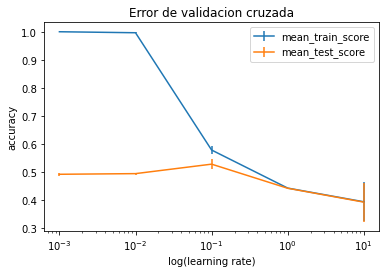

In [257]:
fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_learning_rate_init', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_learning_rate_init', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_xscale('log')
ax.set_xlabel('log(learning rate)')
ax.set_ylabel('accuracy')
ax.set_title('Error de validacion cruzada');

In [258]:
# Espacio de búsqueda de cada hiperparámetro
param_distributions = {
    'hidden_layer_sizes': [(15), (20), (50), (100), (15, 15), (20, 20), (100, 100)],
    'alpha': np.logspace(-3, 3, 7),
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Búsqueda por validación cruzada
grid = RandomizedSearchCV(
        estimator  = MLPClassifier(solver = 'lbfgs', max_iter= 500),
        param_distributions = param_distributions,
        n_iter     = 100, # Número máximo de combinaciones probadas
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 3, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X, y = y)

# Resultados del grid
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

,param_learning_rate_init,param_hidden_layer_sizes,param_alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
75,0.01,"(100, 100)",100,0.575082,0.004486,0.598970,0.004352
15,0.01,"(15, 15)",100,0.573276,0.006091,0.593846,0.004634
71,0.1,"(100, 100)",100,0.573178,0.007535,0.598604,0.004479
1,0.1,"(20, 20)",100,0.572105,0.006714,0.594993,0.004318
3,0.001,"(15, 15)",100,0.571324,0.007458,0.591284,0.004959
39,0.1,"(15, 15)",100,0.570348,0.003957,0.590796,0.008211
55,0.001,"(20, 20)",100,0.570348,0.006042,0.593285,0.003389
13,0.01,50,100,0.564052,0.005874,0.581206,0.002255
17,0.001,100,100,0.563955,0.005286,0.582329,0.002135
6,0.1,15,100,0.563418,0.004888,0.581109,0.002754


In [259]:
model = grid.best_estimator_
model

MLPClassifier(alpha=100.0, hidden_layer_sizes=(100, 100),
              learning_rate_init=0.01, max_iter=500, solver='lbfgs')

In [260]:
model.fit(X_train, y_train)

MLPClassifier(alpha=100.0, hidden_layer_sizes=(100, 100),
              learning_rate_init=0.01, max_iter=500, solver='lbfgs')

In [261]:
y_predicciones = model.predict(X_test)

In [262]:
#Métricas de evaluación
classificationReport = classification_report(y_test, y_predicciones)

In [263]:
print(classificationReport)

              precision    recall  f1-score   support

           1       0.55      0.51      0.53       431
           2       0.42      0.34      0.37       518
           3       0.40      0.18      0.25       650
           4       0.48      0.44      0.46      1838
           5       0.67      0.83      0.74      2711

    accuracy                           0.58      6148
   macro avg       0.51      0.46      0.47      6148
weighted avg       0.56      0.58      0.56      6148



In [264]:
confusion_matrix_fea = multilabel_confusion_matrix(y_test, y_predicciones)
print(confusion_matrix_fea)

[[[5539  178]
  [ 210  221]]

 [[5382  248]
  [ 342  176]]

 [[5327  171]
  [ 534  116]]

 [[3445  865]
  [1034  804]]

 [[2331 1106]
  [ 448 2263]]]


In [265]:
#conseguimos la matriz de confusión
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_predicciones, labels=model.classes_)

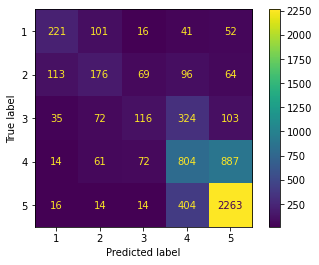

In [266]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=model.classes_)
cm.plot()

In [267]:
# evaluate a perceptron model on the dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.581 (0.008)


In [268]:
cv = KFold(n_splits=10)
yhat = cross_val_predict(model, X, y, cv=cv)
score2 = metrics.f1_score(y, yhat, average='weighted')
print('Weighted average FScore: ' +str(score2))

Weighted average FScore: 0.5607127096867749
